In [155]:
from datetime import datetime, timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import numpy as np
import pandas as pd

plt.style.use('seaborn')

In [156]:
df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

In [157]:
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

df

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,Company Type,Current fulltime,Job created,Job retain,Effective Date,Total Savings,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,LMEP,NaN,NaN,NaN,03/04/2005,0.00,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,LMEP,NaN,NaN,NaN,04/02/2008,136578.20,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,LMEP,1238.0,NaN,NaN,01/05/2015,302959.40,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,ECSP,25.0,NaN,NaN,02/03/2020,2159.67,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,LMEP,2699.0,NaN,NaN,06/30/2017,922407.32,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,"WONTON FOOD, INC.",DONALD LAU,donaldlau@wontonfood.com,7186286868,220-222 MOORE STREET,Brooklyn,NY,11206,Manufacturing,"MFG. PASTA, EGGROLL SKINS",ECSP,210.0,10.0,187.0,12/09/2008,35384.76,965843.58,Brooklyn,40.704425,-73.936010,301.0,34.0,485.0,3071539.0,3.031090e+09,Bushwick South
446,Wood Works,Gordon Brawm,brawnworks@gmail.com,9179404950,162 Cook Street,Brooklyn,NY,11206,Manufacturing,Installer of wood furniture,ECSP,2.0,NaN,NaN,12/05/2017,1457.26,3585.40,Brooklyn,40.702869,-73.936466,301.0,34.0,485.0,3071625.0,3.031230e+09,Bushwick South
447,"WorldWide Plumbing Supply, Inc.",Surie Lefkowitz,sheidya@wwps.com,7188533002,125 Lake Avenue,Staten Island,NY,10303,Manufacturing,"Plumbing Fixtures, Parts & Supplies, Plumbers",ECSP,43.0,NaN,NaN,08/03/2018,8971.02,20487.73,Staten Island,40.633518,-74.150942,501.0,49.0,239.0,5107122.0,5.011610e+09,Mariner's Harbor-Arlington-Port Ivory-Granitev...
448,WUD Furniture LLC,Keren Springer,keren@wudfurniture.com,7184867952,1102 Atlantic Avenue,Brooklyn,NY,11238,Manufacturing,"We make handcrafted furniture, surfaces, lighting",ECSP,7.0,NaN,NaN,01/26/2016,2484.84,12287.32,Brooklyn,40.679518,-73.956819,308.0,35.0,305.0,3027572.0,3.011260e+09,Crown Heights North


##### 2a. Scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

In [158]:
NTA_grp_df = df.groupby(['NTA'])
filt_NTA_df = NTA_grp_df.filter(lambda x: len(x) >= 5)

filt_NTA_df = filt_NTA_df.groupby('NTA').agg({ 
     'Total Savings': 'mean',
     'Job created': 'sum',
})

filt_NTA_df.rename(columns={'Total Savings':'Average Total Savings', 'Job created':'Jobs created'}, inplace=True)

In [159]:
filt_NTA_df

,Average Total Savings,Jobs created
NTA,,
Battery Park City-Lower Manhattan,469890.796667,0.0
Bushwick South,26140.455000,10.0
Carroll Gardens-Columbia Street-Red Hook,24337.390000,0.0
College Point,17159.372857,2.0
Crown Heights North,4036.298889,0.0
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,59950.340000,0.0
East New York,48433.093333,15.0
East Williamsburg,13990.626364,0.0
Greenpoint,9753.649286,0.0


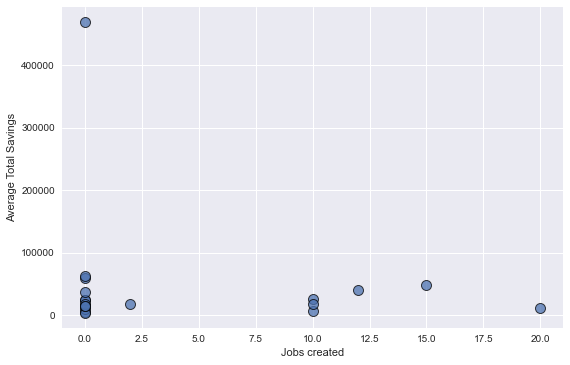

In [160]:
filt_NTA_df.plot.scatter('Jobs created', 'Average Total Savings', s=100, edgecolor='black', linewidth=1, alpha=0.75)

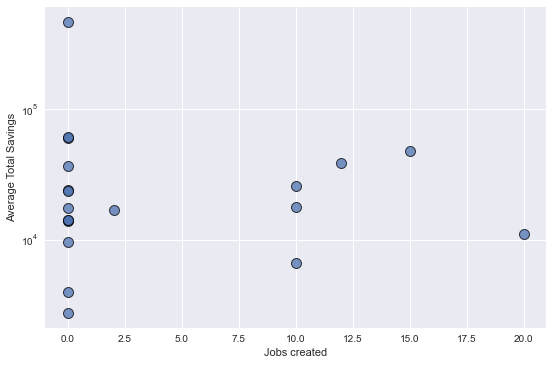

In [161]:
filt_NTA_df.plot.scatter('Jobs created', 'Average Total Savings', s=100, edgecolor='black', linewidth=1, alpha=0.75)
plt.yscale('log')

##### 2b. histogram of the log of the average total savings.

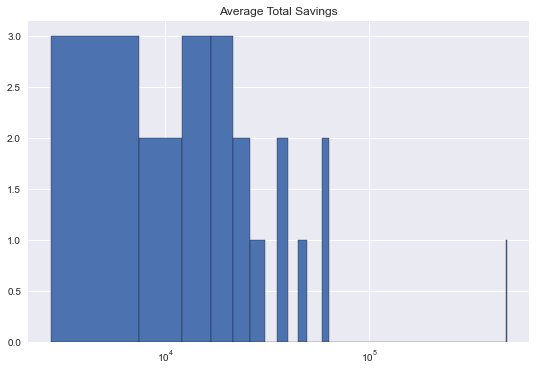

In [162]:
# bins = [1000,5000,10000,15000,20000,25000]
filt_NTA_df.hist('Average Total Savings',bins=100, edgecolor='black')
plt.xscale('log')

Text(0.5, 1.0, 'Average Total Savings')

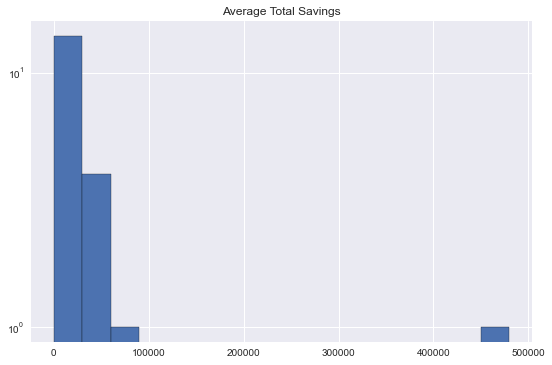

In [163]:
plt.hist(filt_NTA_df['Average Total Savings'], bins=range(0,500000,30000), edgecolor='black', log=True)
plt.title('Average Total Savings')

In [164]:
# df_new = df.merge(filt_NTA_df, on='NTA', how='left')
# df_new.head()

In [261]:
dates_grp = df.groupby(['Effective Date']).agg({ 
     'Job created': 'sum',
})

dates_grp = dates_grp.reset_index()

dates_grp['Effective Date'] = pd.to_datetime(dates_grp['Effective Date'])

dates_grp['Year'] = pd.to_datetime(dates_grp['Effective Date']).dt.year
dates_grp['Month'] = pd.to_datetime(dates_grp['Effective Date']).dt.month

dates_grp['MM/YYYY'] = dates_grp['Effective Date'].dt.year.astype(str) + '-'+ dates_grp['Effective Date'].dt.month.astype(str)

dates_grp

# date_grp = date_grp.groupby('Effective Date').agg({ 
#     'Job created': 'sum',
# })

,Effective Date,Job created,Year,Month,MM/YYYY
0,2012-01-01,0.0,2012,1,2012-1
1,2008-01-02,0.0,2008,1,2008-1
2,2013-01-02,0.0,2013,1,2013-1
3,2015-01-02,0.0,2015,1,2015-1
4,2011-01-03,0.0,2011,1,2011-1
...,...,...,...,...,...
361,2010-12-20,0.0,2010,12,2010-12
362,2017-12-21,0.0,2017,12,2017-12
363,2015-12-23,0.0,2015,12,2015-12
364,2012-12-24,0.0,2012,12,2012-12


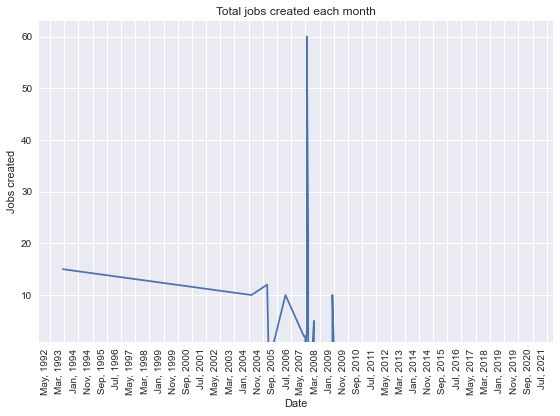

In [323]:
fig, ax = plt.subplots(figsize=(8, 6))

dates = dates_grp['MM/YYYY']
dates_grp['MM/YYYY'] = pd.to_datetime(dates_grp['MM/YYYY'])

dates_grp = dates_grp.set_index(dates_grp['MM/YYYY'])
dates_grp.index.name = None
# dates.sort(dates_grp['MM/YYYY'], inplace=True)

dates_grp = dates_grp.sort_values(by='MM/YYYY')

y = dates_grp['Job created']
plt.plot(dates, y, zorder=10)

# plt.gcf().autofmt_xdate

years = mpl.dates.YearLocator()
months = mpl.dates.MonthLocator(bymonth=range(1,13), interval=10, tz=None)

date_format = mpl_dates.DateFormatter('%b, %Y')

plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(months)
plt.gca().xaxis.set_minor_locator(months)

plt.gcf().autofmt_xdate(rotation=90)


plt.title('Total jobs created each month')
plt.xlabel('Date')
plt.ylabel('Jobs created')

plt.tight_layout()
plt.ylim(bottom=1)
plt.show()